<a href="https://colab.research.google.com/github/NicolasManuelKoch/cap-comp215/blob/main/Nicolas_updated_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 1
----------------
#### Name:
#### Date:

This lab exercise is mostly to introduce some of the power in Jupyter Notebooks.
Note that a Notebook is composed of "cells" - some are "text", like this one, while others are "code"

We'll also review some basic data types (like `int` and `str`) and data structures (like `list` and `dict`)

**New Python Concepts**:
  * `datetime.date` objects represent a calendar date (these are very powerful)
  * *list comprehension* provides a compact way to represent map and filter algorithms

As will be usual, the fist code cell, below, simply imports all the modules we'll be using...

In [23]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint    # Pretty Print - built-in python function to nicely format data structures

### API Query

Now, let's fetch some Covid-19 daily case-count data from the Open Covid API:  https://opencovid.ca/api/

Query:
  - `stat=cases`        # the type of data to fetch
  - `loc=BC`            # the location to fetch data for
  - `after=2022-11-01`  # since the 1st of november (note date format:  yyyy-mm-dd)

In [24]:
locationcode_query = "593"
date_query = "2022-11-01"
query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=' + locationcode_query + '&geo=hr&after=' + date_query

response = requests.request("GET", query, headers={}, data={})
print(type(response.text), response.text)

<class 'str'> {"data":{"cases":[{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-01","value":78661,"value_daily":13},{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-02","value":78676,"value_daily":15},{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-03","value":78682,"value_daily":6},{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-04","value":78699,"value_daily":17},{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-05","value":78716,"value_daily":17},{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-06","value":78727,"value_daily":11},{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-07","value":78739,"value_daily":12},{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-08","value":78751,"value_daily":12},{"name":"cases","region":"BC","sub_region_1":"593","date":"2022-11-09","value":78769,"value_daily":18},{"name":"cases","region":"BC","sub_region_

Notice that the response looks like a dictionary, but is actually just a string of text (most data is exchanged on the web as plain text!).  This particular data format is called "[JSON](https://en.wikipedia.org/wiki/JSON)" 

The `json.loads` function "parses" such text and loads the data into a dictionary...

In [25]:
result = json.loads(response.text)
pprint(result)   # pretty-print the entire data structure we got back...

{'data': {'cases': [{'date': '2022-11-01',
                     'name': 'cases',
                     'region': 'BC',
                     'sub_region_1': '593',
                     'value': 78661,
                     'value_daily': 13},
                    {'date': '2022-11-02',
                     'name': 'cases',
                     'region': 'BC',
                     'sub_region_1': '593',
                     'value': 78676,
                     'value_daily': 15},
                    {'date': '2022-11-03',
                     'name': 'cases',
                     'region': 'BC',
                     'sub_region_1': '593',
                     'value': 78682,
                     'value_daily': 6},
                    {'date': '2022-11-04',
                     'name': 'cases',
                     'region': 'BC',
                     'sub_region_1': '593',
                     'value': 78699,
                     'value_daily': 17},
                    {'date': '2022-11-05'

### Extract data items from a list of dictionaries
Next we use "list comprehension" to extract the list of dates and associated cases into "parallel lists"

Notice how we "parse" the date strings, using strptime, into a real date objects so they are easier to work with (format: yyyy-mm-dd)

In [26]:
cases = result['data']['cases']
case_dates = [daily['date'] for daily in cases]     # List Comprehension #1: extract the case date strings
n_cases = [daily['value_daily'] for daily in cases] # List Comprehension #2:  extract the case counts

print('Dates:', case_dates[:10])      # do you recall the "slice" operation?  If not, look it up in the ThinkCsPy textbook!
print('Cases:', n_cases[:10])
print('Zipped:', list(zip(case_dates[:10], n_cases[:10])))  # zip is a very handy function to "zip" 2 lists together like a zipper...

Dates: ['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10']
Cases: [13, 15, 6, 17, 17, 11, 12, 12, 18, 15]
Zipped: [('2022-11-01', 13), ('2022-11-02', 15), ('2022-11-03', 6), ('2022-11-04', 17), ('2022-11-05', 17), ('2022-11-06', 11), ('2022-11-07', 12), ('2022-11-08', 12), ('2022-11-09', 18), ('2022-11-10', 15)]


### Datetime.date
Working with date stings is a pain.  So many formats!  Even within Canada, you might see:
"Jan. 9, 2023" or "09-01-2023" or "2023-01-09" or ....
Imagine trying to do a calculation like "how many days between these 2 dates"!!
The build-in `datetime` package makes working with dates much easier.
  * step 1: "parse" the date string data (`strptime` ==  "string-parse-datetime object")
  * step 2: get the date part (i.e., without the time)

In [27]:
# parse a datetime object from a string by supplying the correct "format" string.
datetime_objects = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in case_dates]  # List Comprehension #3

# but we only need the "date" part...
dates = [dt.date() for dt in datetime_objects]
print(dates[:10])

[datetime.date(2022, 11, 1), datetime.date(2022, 11, 2), datetime.date(2022, 11, 3), datetime.date(2022, 11, 4), datetime.date(2022, 11, 5), datetime.date(2022, 11, 6), datetime.date(2022, 11, 7), datetime.date(2022, 11, 8), datetime.date(2022, 11, 9), datetime.date(2022, 11, 10)]


## Exercise 1

In the code cell below, re-write each of the 3 "List Comprehensions" in the code cells above as a loop so you understand how they work.

Notice that a "list comprehension" is a compact way to write a "list accumulator" algorithm (and more efficient too!)

In [28]:
cases = result['data']['cases']
datetime_objects2 = []
n_cases2 = []
case_dates2 = []
for daily in cases:
  case_dates2 = case_dates2 + [daily['date']] # For every new data, add that data to list.
for date in case_dates:
  datetime_objects2 = datetime_objects2 + [datetime.datetime.strptime(date, '%Y-%m-%d')] # For every new data, add that data to list.
for daily in cases:
  n_cases2 = n_cases2 + [daily['value_daily']] # For every new data, add that data to list.

dates_new = [dt.date() for dt in datetime_objects2]
print('Dates:', dates_new[:10])
print('Cases:', n_cases2[:10])

Dates: [datetime.date(2022, 11, 1), datetime.date(2022, 11, 2), datetime.date(2022, 11, 3), datetime.date(2022, 11, 4), datetime.date(2022, 11, 5), datetime.date(2022, 11, 6), datetime.date(2022, 11, 7), datetime.date(2022, 11, 8), datetime.date(2022, 11, 9), datetime.date(2022, 11, 10)]
Cases: [13, 15, 6, 17, 17, 11, 12, 12, 18, 15]


### Generating a plot

Finally, we'll plot the (dates,cases) data as a nice x-y line graph.

The code to format the x-axis labels is taken from https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html

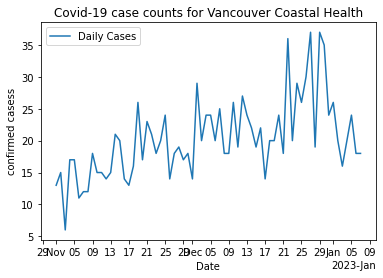

In [29]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, n_cases, label='Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('confirmed casess')  # Add a y-label to the axes.
ax.set_title("Covid-19 case counts for Vancouver Coastal Health")  # Add a title to the axes.
ax.legend();

## Exercise 2

Repeat the analysis above, but this time only for Vancouver Coastal Health Region.

 * Try to modify as little code as you can (just need to change the "query"), and re-run the analysis
 * You can get the ***hruid*** location code for each health region here:  https://github.com/ccodwg/CovidTimelineCanada/blob/main/geo/hr.csv
 * Can you generalize the code in the 2nd code cell to make it easier to repeat the analysis for different locations?  What about for different dates?

## OPTIONAL - Take your skills to the next level...

## Exercise 3

Notice that the data plot looks quite erratic.  These swings most likely represent artifacts attributable to the reporting process rather than actual changes in infection rates.

 * One way to fix this is is to "smooth" the date with a "7-day rolling average".
Each day, we take the average of the previous 7 days cases.
 * Add new code cell below, compute the 7-day rolling average for each day from the cases list.
 * Create a plot to display the rolling average data and compare your plot with the one produced above.

 Hints: you are free to do this however you like, but a quite elegant solution uses list comprehension, range, and slices

[13.0, 12.857142857142858, 13.285714285714286, 14.571428571428571, 14.285714285714286, 13.857142857142858, 14.428571428571429, 15.714285714285714, 16.857142857142858, 16.285714285714285, 16.0, 16.142857142857142, 17.857142857142858, 18.142857142857142, 18.428571428571427, 18.571428571428573, 19.142857142857142, 20.142857142857142, 21.285714285714285, 19.571428571428573, 19.714285714285715, 19.142857142857142, 18.571428571428573, 18.571428571428573, 17.714285714285715, 18.428571428571427, 19.285714285714285, 20.142857142857142, 20.857142857142858, 21.285714285714285, 22.285714285714285, 22.857142857142858, 21.285714285714285, 22.142857142857142, 21.428571428571427, 21.857142857142858, 22.428571428571427, 22.0, 22.142857142857142, 22.714285714285715, 21.0, 21.142857142857142, 20.142857142857142, 20.142857142857142, 19.571428571428573, 22.0, 21.714285714285715, 23.857142857142858, 24.714285714285715, 26.142857142857142, 28.0, 28.142857142857142, 28.285714285714285, 30.428571428571427, 29.

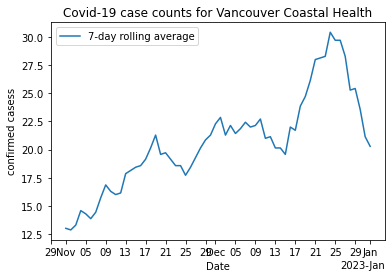

In [30]:
average2 = []
windowsize = 7
adjust_for_windowsize = windowsize - 1
for i in range(len(n_cases2)-adjust_for_windowsize): # Repeat for the amount of integers minus the number needed to get a full set of "windowsize" in the end.
  average = n_cases2[i:i+windowsize] # Get a list with 7 numbers.
  average2 = average2 + [(sum(average))/windowsize] # Calcuate the average of the list created above by adding all numbers together and deviding by windowsize.
print(average2)

dates_new_plot = dates[0:len(average2)] # Adjust for new length of list.
fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates_new_plot, average2, label='7-day rolling average')  # Plot some data on the axes (the 7 day rolling average).
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('confirmed casess')  # Add a y-label to the axes.
ax.set_title("Covid-19 case counts for Vancouver Coastal Health")  # Add a title to the axes.
ax.legend();